The purpose of this file is to plot the data of the IPCC assessed scenarios found on this link 

AR6

https://data.ene.iiasa.ac.at/ar6/#/downloads

Date 23 July 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#read the dataframe 
ipcc = pd.read_excel('Paris alligned scenarios AR6 Jusly 2022.xlsx')

In [12]:
ipcc.head()

,model,scenario,region,variable,unit,Scenario type,1995,2020,2030,2040,2050
0,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy,EJ/yr,Paris Alligned Scenario,NaN,51.186788,34.303210,29.978690,34.075975
1,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Coal,EJ/yr,Paris Alligned Scenario,NaN,4.213251,1.693012,1.131144,2.006478
2,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Gas,EJ/yr,Paris Alligned Scenario,NaN,18.363378,8.249693,5.872612,6.699530
3,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Hydro,EJ/yr,Paris Alligned Scenario,NaN,0.640225,1.410672,2.536816,3.852988
4,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Nuclear,EJ/yr,Paris Alligned Scenario,NaN,0.105030,0.212476,0.372738,0.598166


In [13]:
# get a list of energy variables 

energy_variables = ['Primary Energy', 'Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [14]:
ipcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   model           1936 non-null   object 
 1   scenario        1936 non-null   object 
 2   region          1936 non-null   object 
 3   variable        1936 non-null   object 
 4   unit            1936 non-null   object 
 5   Scenario type   1936 non-null   object 
 6   1995            0 non-null      float64
 7   2020            1936 non-null   float64
 8   2030            1936 non-null   float64
 9   2040            1936 non-null   float64
 10  2050            1936 non-null   float64
dtypes: float64(5), object(6)
memory usage: 166.5+ KB


In [15]:
ipcc.shape

(1936, 11)

In [20]:
ipcc = ipcc.drop(columns=[1995])

In [21]:
ipcc.head()

,model,scenario,region,variable,unit,Scenario type,2020,2030,2040,2050
0,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy,EJ/yr,Paris Alligned Scenario,51.186788,34.303210,29.978690,34.075975
1,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Coal,EJ/yr,Paris Alligned Scenario,4.213251,1.693012,1.131144,2.006478
2,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Gas,EJ/yr,Paris Alligned Scenario,18.363378,8.249693,5.872612,6.699530
3,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Hydro,EJ/yr,Paris Alligned Scenario,0.640225,1.410672,2.536816,3.852988
4,C3IAM 2.0,2C-hybrid,R10AFRICA,Primary Energy|Nuclear,EJ/yr,Paris Alligned Scenario,0.105030,0.212476,0.372738,0.598166


In [48]:
# count the number of scenarios 

ipcc.scenario.nunique()

26

In [43]:
ipcc.variable.unique()

array(['Primary Energy', 'Primary Energy|Coal', 'Primary Energy|Gas',
       'Primary Energy|Hydro', 'Primary Energy|Nuclear',
       'Primary Energy|Oil', 'Primary Energy|Solar',
       'Primary Energy|Wind', 'Primary Energy|Fossil'], dtype=object)

In [44]:
specific_variables = ['Primary Energy|Coal', 'Primary Energy|Gas',
       'Primary Energy|Oil', 'Primary Energy|Solar',
       'Primary Energy|Wind', 'Primary Energy|Fossil']

In [45]:
ipcc_s = ipcc[ipcc['variable'].isin(specific_variables)]

In [25]:
# convert the data to long formate again to make sure the scenarios we have hold all the energy sources of interest
"""
ipcc_final = ipcc.melt(id_vars = ['model','scenario','region'],
                                    value_vars = ['Primary Energy','Primary Energy|Coal','Primary Energy|Fossil','Primary Energy|Gas','Primary Energy|Hydro',	
                                    'Primary Energy|Nuclear','Primary Energy|Oil','Primary Energy|Solar','Primary Energy|Wind'],
                                    var_name = 'Energy Source',
                                    value_name = 'Demand EJ/yr')
"""

## Plotting the outcome of energy scenarioes

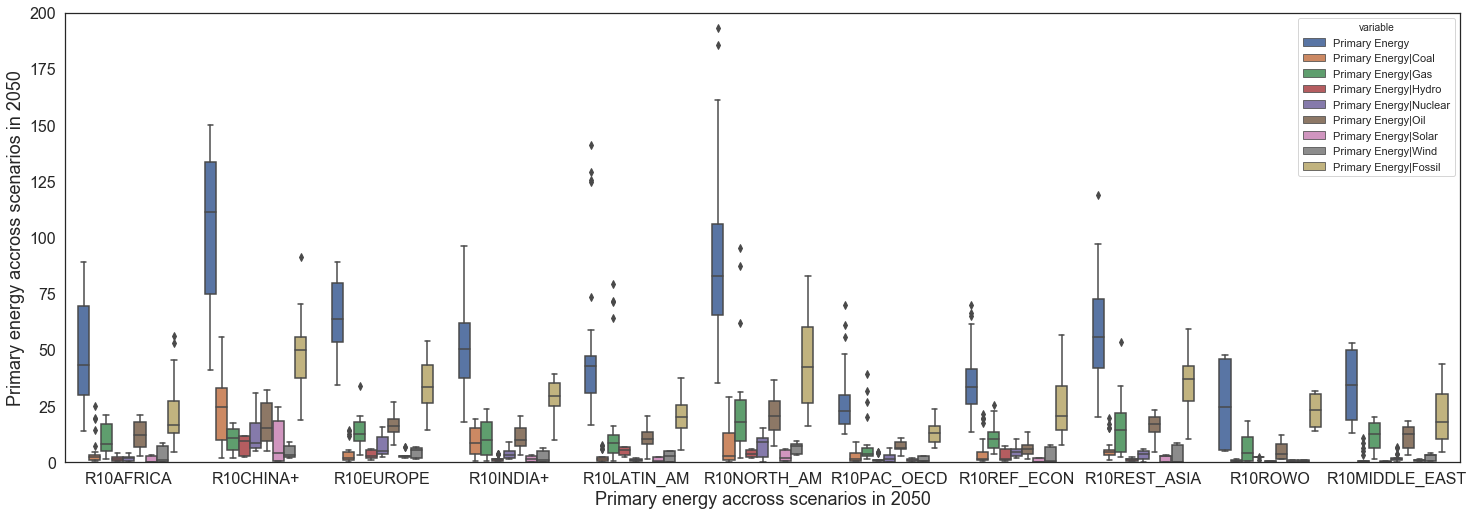

In [31]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(25,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='region', y=2050, data=ipcc, hue = "variable")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0, 200)

plt.xlabel('Primary energy accross scenarios in 2050', size = 18)
plt.xticks(size = 16);




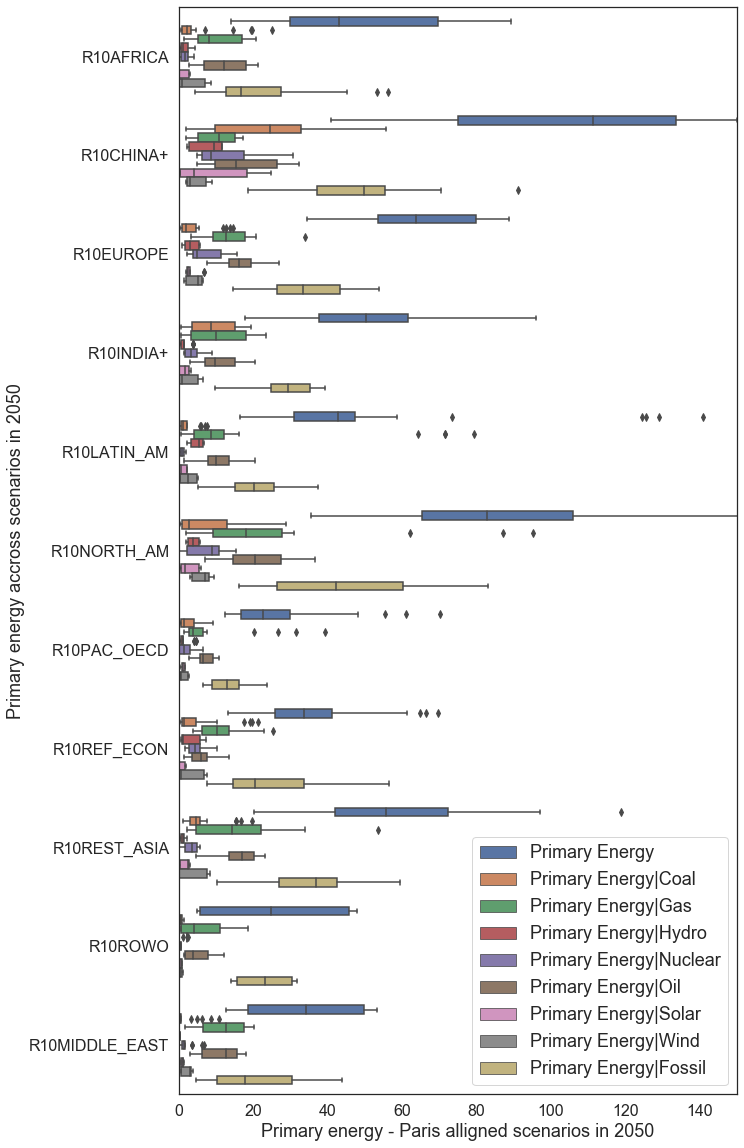

In [42]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 150)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


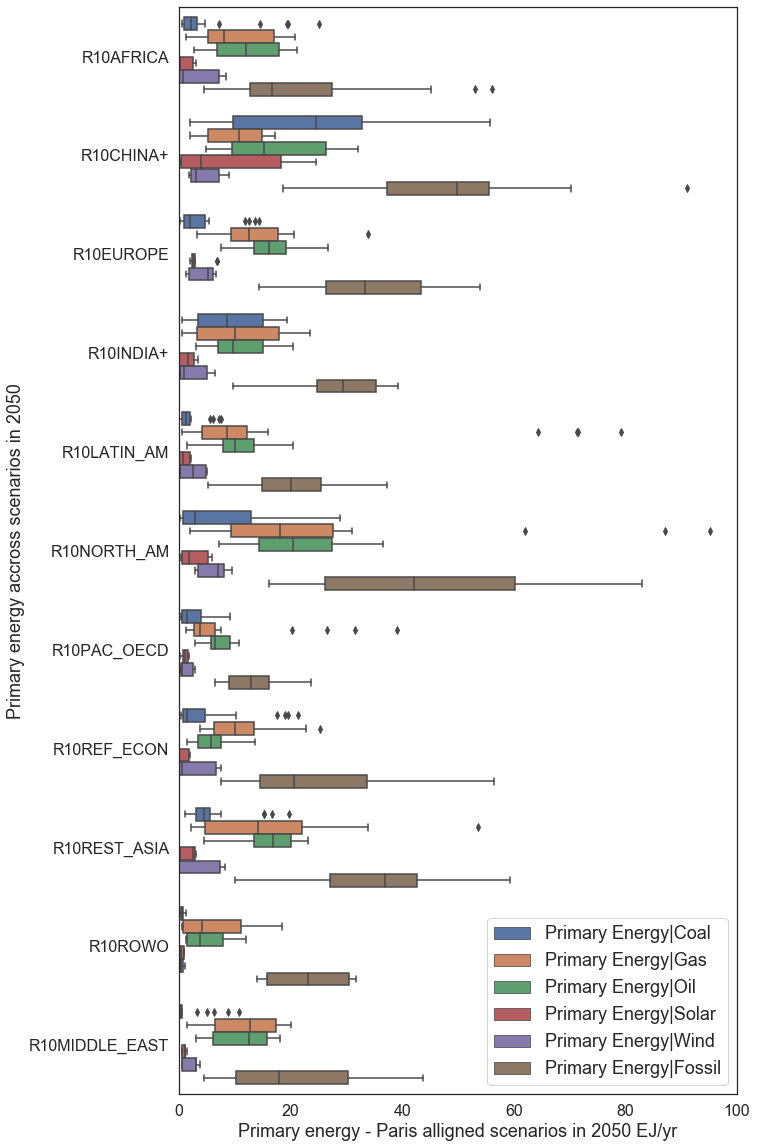

In [49]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc_s, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 100)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050 EJ/yr', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})
